           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url    price  year  \
0                prescott    https://prescott.craigslist.org   6000.0   NaN   
1            fayetteville       https://fayar.craigslist.org  11900.0   NaN   
2            florida keys        https://keys.craigslist.org  21000.0   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500.0   NaN   
4              greensboro  https://greensboro.craigslist.org   4900.0   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ..

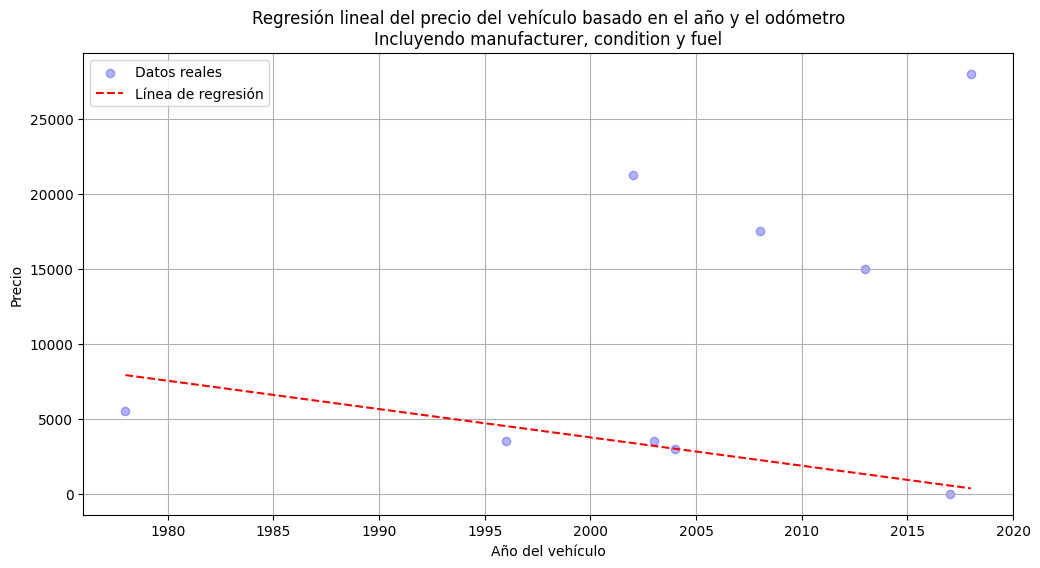

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# Leer el fichero vehicles.csv
file_path = 'vehicles.csv'
df = pd.read_csv(file_path)

# Mostrar los primeros registros del dataframe
print(df.head())

# Filtrar las columnas necesarias y eliminar filas con valores faltantes
df_filtered = df[['year', 'price', 'odometer', 'manufacturer', 'condition', 'fuel']].dropna()

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_filtered[['year', 'odometer', 'manufacturer', 'condition', 'fuel']]
y = df_filtered['price']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el preprocesador para las variables categóricas
categorical_features = ['manufacturer', 'condition', 'fuel']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear el preprocesador completo
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Crear el pipeline con el preprocesador y el modelo de regresión lineal
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones para el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

# Preparar los datos para graficar
year_range = np.linspace(df_filtered['year'].min(), df_filtered['year'].max(), 100)
odometer_median = df_filtered['odometer'].median()
manufacturer_mode = df_filtered['manufacturer'].mode()[0]
condition_mode = df_filtered['condition'].mode()[0]
fuel_mode = df_filtered['fuel'].mode()[0]

# Crear un dataframe para las predicciones de la línea de regresión
pred_data = pd.DataFrame({
    'year': year_range,
    'odometer': odometer_median,
    'manufacturer': manufacturer_mode,
    'condition': condition_mode,
    'fuel': fuel_mode
})
price_pred = model.predict(pred_data)

# Graficar los datos reales y la línea de regresión
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los datos reales
plt.scatter(df_filtered['year'], df_filtered['price'], color='blue', alpha=0.3, label='Datos reales')

# Línea de regresión
plt.plot(year_range, price_pred, color='red', linestyle='--', label='Línea de regresión')

plt.xlabel('Año del vehículo')
plt.ylabel('Precio')
plt.title('Regresión lineal del precio del vehículo basado en el año y el odómetro\nIncluyendo manufacturer, condition y fuel')
plt.legend()
plt.grid(True)
plt.show()